# Analysis of Fitness Class Dataset to make prediction on which bookings will actually attend classes 

## Importing packages, dataset, and doing preliminary analysis of the dataset 

In [1]:
# Importing packages, dataset, and doing preliminary analysis of the dataset 

import pandas as pd, numpy as np 
import matplotlib.pyplot as plt, seaborn as sns 

dataset = 'https://s3.amazonaws.com/talent-assets.datacamp.com/fitness_class_2212.csv'
gymdf = pd.read_csv(dataset)

print(gymdf.info())
print()
print(gymdf.describe(percentiles=[0.5, 0.75, 0.8,  0.85, 0.9,  0.95,0.96,0.97,0.98, 0.99 ]) )
print()
print(gymdf.describe(include='O'))
# print()
# print(gymdf.head(), gymdf.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB
None

        booking_id  months_as_member       weight     attended
count  1500.000000       1500.000000  1480.000000  1500.000000
mean    750.500000         15.628667    82.610378     0.302667
std     433.157015         12.926543    12.765859     0.459565
min       1.000000          1.000000    55.410000     0.000000
50%     750.500000         12.000000    

Data Validation 
The dataset contains 1500 rows and 8 columns, some of them with missing values and misplaced datatypes before cleaning. I have validated all the columns against the criteria/description in the criteria table:

booking_id: described as nominal, but shows in the dataframe as a numeric (int) datatype. It has no missing values. It is a unique identifier (as serial numbers) automatically assigned to each booking by the database. As such, it does not seem to add any value to the analysis of the dataset, but due to its unique values, can be preserved in the dataframe as index. Therefore, setting this column as row index. 

months_as_member: Same as description with discrete values (int datatype), with no missing values. There are some outliers on the higher side, which we will deal with in the exploratory stage. 

weight: has continuous numeric values, saved as float datatype. Minimum value for weight variable in the dataset is 55.41 kgs, which satisfies the criteria that minimum possible value is 40.00 kg. This column has 20 missing values which I have replaced with overall average, i.e. arithmetic mean, weight as directed in the criteria. 

days_before: has no missing values, but is described as discrete variable, but dataset shows object datatype. On further inspection, understood that this is due to the string ' days' suffixed to the numbers in many rows. Stripping this string where it appears, and then converting to a discrete datatype int. 

day_of_week: has no missing values. Described as ordinal with values as one of 7 values among: [“Mon”, “Tue”, “Wed”, “Thu”, “Fri”, “Sat” or “Sun”], but appears as object datatype with 10 unique values in the dataset. Alternative spellings of some of the days, eg. 'Monday' instead of 'Mon', 'Wednesday' instead of 'Wed', 'Fri.' instead of 'Fri', have been used, which I have replaced with standard version as in the description. Then, I have converted the column to ordered (in same order as given in the description) category datatype to fit the description of ordinal variable. 

time: has no missing values. Described as ordinal with values as either “AM” or “PM”, but appears as object datatype with the same 2 values as in the description. I have converted the column to ordered category (in the same order as given in the description, i.e. ['AM', 'PM']) datatype to fit the description of ordinal variable. 

category: Described as Nominal with values among the type of the fitness class, i.e. one of 5 values: “Yoga”, “Aqua”, “Strength”, “HIIT”, or “Cycling”. In the dataset, this variable appears as object datatype with 6 unique values: ['Strength' 'HIIT' 'Cycling' 'Yoga' '-' 'Aqua']. Apparently missing values may have been entered as '-' during data-generation. There are 13 rows with such missing values. Replaced '-' with 'unknown' as per the criteria. Then, converted the column to categorical datatype to better suit the organization of values in this column. 
	
attended: Described in the criteria as Nominal variable denoting whether the member attended the class (1) or not (0). Appears in the dataset with int64 datatype and values 0 and 1 as in the description without any missing values. I think we should keep the values in this variable as they will serve as labels in binary (0 for not attended, and 1 for attended) classification model in upcoming tasks. 

In [2]:
# code for items covered under Task 1 

# setting booking_id column as index 
gymdf.set_index('booking_id', inplace=True)

# replacing missing values in weight column with column average 
gymdf.weight.fillna(gymdf.weight.mean(), inplace=True)

# stripping text from days_before column 
gymdf.days_before = gymdf.days_before.str.strip(' days')
# converting days_before column to int64 datatype 
gymdf.days_before = pd.to_numeric(gymdf.days_before)

# checking unique values in day_of_week column
print('unique values in day_of_week column\n', gymdf.day_of_week.unique())
# replacing non-standard spelligs in day_of_week column with those in the description 
gymdf.day_of_week.replace({'Wednesday':'Wed', 'Fri.':'Fri', 'Monday': 'Mon' }, inplace=True)
# converting day_of_week column to ordered category datatype 
gymdf.day_of_week = gymdf.day_of_week.astype('category')
gymdf.day_of_week = gymdf.day_of_week.cat.reorder_categories(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
gymdf.day_of_week = gymdf.day_of_week.cat.as_ordered()

# checking unique values in time column
print('unique values in time column\n', gymdf.time.unique()) 
# converting time column to ordered category datatype
gymdf.time = gymdf.time.astype('category')
gymdf.time = gymdf.time.cat.reorder_categories(['AM', 'PM'])
gymdf.time = gymdf.time.cat.as_ordered()

# checking unique values in category column
print('unique values in category column\n', gymdf.category.unique())
# replacing '-' with 'unknown' in category column 
gymdf.category.replace('-', 'unknown', inplace=True)
# converting category column to category datatype 
gymdf.category = gymdf.category.astype('category')

# checking unique values + counts in attended column
print('attended column value counts \n', gymdf.attended.value_counts())

unique values in day_of_week column
 ['Wed' 'Mon' 'Sun' 'Fri' 'Thu' 'Wednesday' 'Fri.' 'Tue' 'Sat' 'Monday']
unique values in time column
 ['PM' 'AM']
unique values in category column
 ['Strength' 'HIIT' 'Cycling' 'Yoga' '-' 'Aqua']
attended column value counts 
 0    1046
1     454
Name: attended, dtype: int64


After the data validation, the dataset contains 1500 rows, 7 columns, with the 1st column from original dataset now appearing as row index. 

In [3]:
# Viewing dataset summary after validation 
print('\nViewing dataset summary after validation ')
print(gymdf.info() )
print()
print(gymdf.describe(exclude='category', percentiles=[0.5, 0.75, 0.8,  0.85, 0.9,  0.95,0.96,0.97,0.98, 0.99 ]) )
print(gymdf.describe(include='category') )


Viewing dataset summary after validation 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 1 to 1500
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   months_as_member  1500 non-null   int64   
 1   weight            1500 non-null   float64 
 2   days_before       1500 non-null   int64   
 3   day_of_week       1500 non-null   category
 4   time              1500 non-null   category
 5   category          1500 non-null   category
 6   attended          1500 non-null   int64   
dtypes: category(3), float64(1), int64(3)
memory usage: 63.7 KB
None

       months_as_member       weight  days_before     attended
count       1500.000000  1500.000000  1500.000000  1500.000000
mean          15.628667    82.610378     8.346667     0.302667
std           12.926543    12.680411     4.077938     0.459565
min            1.000000    55.410000     1.000000     0.000000
50%           12.000000    81.0350

## Creating a visualization that shows how many bookings attended the class.
I have created two visualization to view the distribution of values in the 'attended' variable. The bar chart shows the absolute count of bookings that attended (represented by 1 in the dataset), and those that did not attend (represented by 0 in the dataset), whereas the pie chart shows the same comparison as percentages.

[Text(0, 0, '1046'), Text(0, 0, '454')]

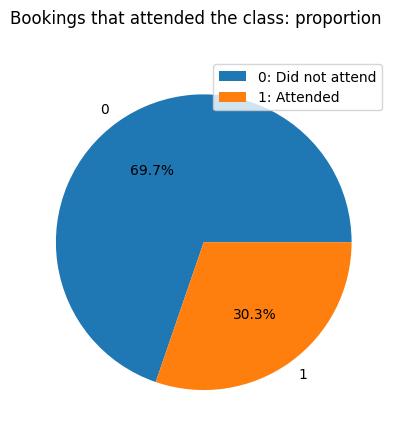

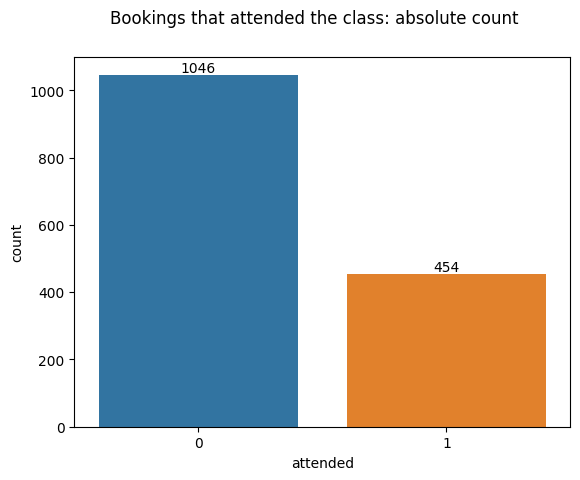

In [4]:
# code for items covered under Task 2
# plotting the distribution of attended column
# Pie chart for proportion (as percentage)
g,ax2 = plt.subplots()
g.suptitle('Bookings that attended the class: proportion')
ax2.pie(gymdf.attended.value_counts().values, labels=gymdf.attended.value_counts().index, autopct='%.01f%%')
ax2.legend(['0: Did not attend', '1: Attended'], loc='upper right')

# Bar chart for absolute counts
g,ax1 = plt.subplots()
g.suptitle('Bookings that attended the class: absolute count')
sns.countplot(data=gymdf, x='attended', ax=ax1)
ax1.bar_label(ax1.containers[0], label_type='edge')

In [5]:
print('Distribution of values in attended column: ',)
print(gymdf.attended.value_counts())

Distribution of values in attended column: 
0    1046
1     454
Name: attended, dtype: int64


### Is the Target variable balanced?

Even by glancing at the graphs, we can clearly see that those bookings that did not attend are more than twice the number of bookings that did attend a class. To be clear, out of 1500 bookings, 1046 (or about 70%) did not attend the class, and only 454 (or about 30%) attended the class. 

Evidently, there is an imbalance in the observations of the attended variable. We have 2 categories under this variable - let's call them class 1, and class 0. 
Class 0, having larger proportion, is the majority class, and class 1 with smaller proportion is the minority class. 

Since we are going to build a binary classification prediction model to predict the class labels for 'attended' variable based on our dataset, class imbalance could mean that when the model does make any wrong predictions, it may tend to skew towards the dominant/majority class - that is, the instances of samples being mistakenly labeled 0 (the majority class) may be more than those mistakenly labeled as 1 (the minority class). 

However, considering that the dataset is fairly large and despite the imbalance, we will still have a respectable number of 454 records under the minority class, I think the model will have sufficient data to learn the behavior of each class. With that in mind, we will not do anything further to address the class imbalance and proceed with the dataset as it is now. 

## Describing the distribution of the number of months as a member. 

As we have seen in the dataset summary we had drawn at the beginning of our analysis (during Task 1), the values in this column range from 1 month to 148 months, with a median value of 12 months as members. Also to be noted that almost 90% of the members have been members for less than 29 months. 

The relevant quantile values are as follows:

![image-4](image-4.png)

To view the distribution of the number of months as a member, I have plotted the values in column 'months_as_member' on a boxplot, and additionally on an ECDF plot which represents the proportion of observations falling below each unique value in our observations. 

Text(25, 0.8, '96% bookings by members less than 41 months as members')

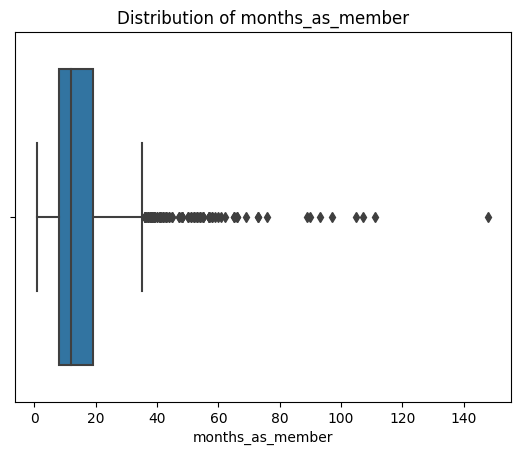

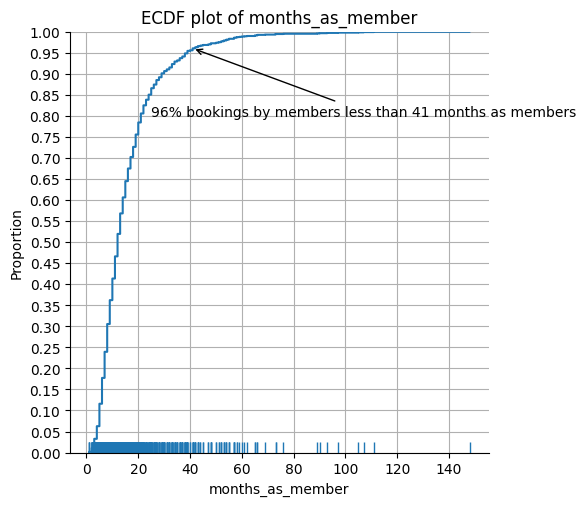

In [6]:
# plotting distribution of column months_as_member 
sns.boxplot(data=gymdf, x='months_as_member').set_title('Distribution of months_as_member')
f=sns.displot(data=gymdf, x='months_as_member', kind='ecdf', rug=True)
f.ax.set(yticks=np.arange(0,1.01,0.05), title='ECDF plot of months_as_member')
f.ax.grid(which='both', axis='both')
f.ax.annotate('96% bookings by members less than 41 months as members', xy=(41,0.96), xytext=(25,0.80), arrowprops={'arrowstyle':'->'} )

As we can see in the boxplot, and more clearly in the ECDF plot, the column 'months_as_member' has a quite a few (but small proportion of overall observations) outliers on the higher side. 

The Inter quartile range or IQR (the difference between the 0.75th and 0.25th quantiles of the data) for this column is 11 months. The widely used standard for calculating threshold for outliers on the higher side is 1.5 - 2 times the IQR above the 0.75th quantile. In our case, that calculates to values between 19 + round(11 * 1.5) = 36 months, and 19 + round(11 * 2) = 41 months. Juxtaposing this with the quantile data, we can see that 96 percent of observations have a value less than about 41 months as member. 

If we consider 41 months as threshold for outliers, the outlier values range from 41 to 148 months in about 4% (or about 60 rows) of observations. That is about 3.5 years to about 12 years as a member. Since we do not know how long the fitness club has been in operation, we cannot say with certainty that these values could be a result of an error. Perhaps, there may indeed be an odd member who has been a customer for as many as 12 years. 

I was very inclined to replace the outlying values with the median value of 12 months, but before doing that, I decided to check how these outliers are impacting our target variable, ie. class attended or not, and the results are as follows: 

![image-3](image-3.png)

That is a whopping 91% (ie. 55 attended out of 60 bookings) attendance against booking, where the average for the dataset is barely 30%. They also represent about 12% of the total minority class (454) of 'attended' variable. It could be that the seniority of a member as a customer may positively influence their commitment to attending classes they have booked. We can't say this with certainty at this stage, but if we meddle with this aspect of the data, I feel we may end up losing a relevant factor in our prediction model. 

Hence, I have kept the outliers in this variable as they are, without making any adjustments. 

In [7]:
# Calculating quantiles for months_as_member 
print('Quantile Months')
print(gymdf.months_as_member.quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.96, 0.975]), '\n' )

# calculating attendance on bookings for outliers in months_as_members:
print('Attendance on bookings for customers > 41 months as members:')
print(gymdf.query('months_as_member>41').attended.value_counts())

Quantile Months
0.250     8.000
0.500    12.000
0.750    19.000
0.900    29.000
0.950    39.000
0.960    41.040
0.975    51.525
Name: months_as_member, dtype: float64 

Attendance on bookings for customers > 41 months as members:
1    55
0     5
Name: attended, dtype: int64


## Describing the relationship between attendance and number of months as a member.
Before we draw visualizations, let us first see the summary statistics when months_as_member column is grouped by attended.

![image-5](image-5.png)

We have already seen in a previous task that the overall count of observations in the attended category 0 is more than twice the count for attended category 1. Viewing the above summary statistics, we further understand that the overall distribution for bookings that attend classes has higher values for months_as_members than the distribution for bookings that eventually dont attend the booked classes. This is also reflected in the mean, median as well as 25 and 75 percentile values for month_as_members for each group.  

In [8]:
# calculating summary statistics for months_as_member grouped by Attendance
print('Summary statistics for months_as_member grouped by Attendance')
print(gymdf.groupby('attended')['months_as_member'].describe() )

Summary statistics for months_as_member grouped by Attendance
           count       mean        std  min   25%   50%    75%    max
attended                                                             
0         1046.0  11.495220   7.171546  1.0   7.0  10.0  14.00   57.0
1          454.0  25.151982  17.433856  4.0  14.0  20.0  29.75  148.0


In the following plot, have overlaid histograms for months_as_member grouped by attended variable. We can clearly see that while the count of observations under grouping 0 is much higher, the spread of months_as_member values is more on the right side for grouping 1. 

[Text(0.5, 1.0, 'Comparative histograms of months_as_member grouped by Attendance')]

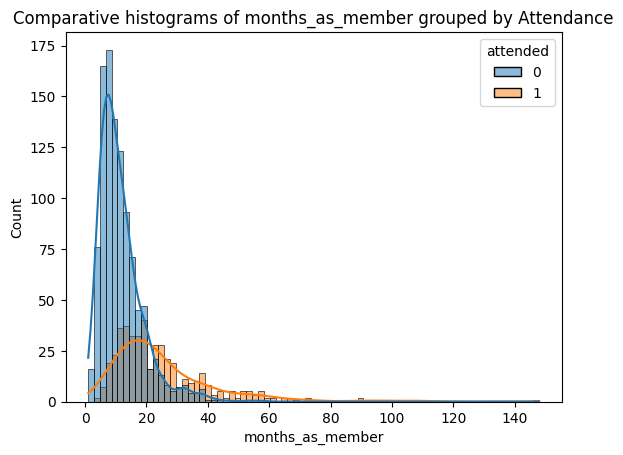

In [9]:
ax = sns.histplot(data=gymdf, hue='attended', x='months_as_member', kde=True)
ax.set(title='Comparative histograms of months_as_member grouped by Attendance')

To visualize the distribution within each group, let us plot them side by side on a boxenplot. As can be seen in the boxenplots, the entire distribution for attended category 1 has shifted higher on the y-axis for months_as_members than that for attended category 0. Almost all quantiles (denoted by the top and bottom edges of individual boxes) for the right side plot (attended=1) are higher than for the left side plot (attended=0). 

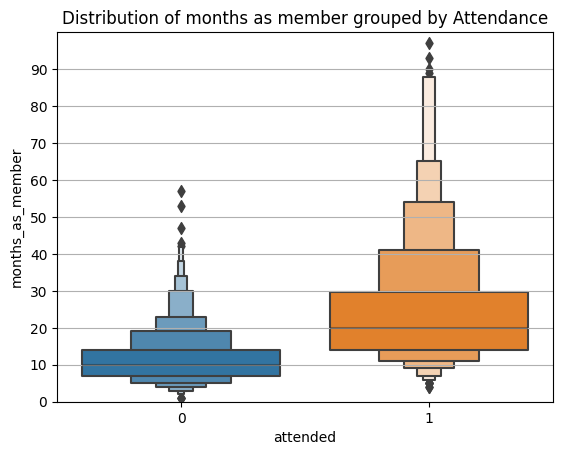

In [10]:
# plotting distribution of columns months_as_member vs attended 
ax = sns.boxenplot(data=gymdf, x='attended', y='months_as_member')
ax.set(title='Distribution of months as member grouped by Attendance', ylim=(0,100), yticks=range(0,100,10))
ax.grid(which='both', axis='y')

To see how this distribution progresses on a cumulative scale, I have also plotted both the distributions on the same ECDF plot. Here as well, we can see that the line for category 1 is noticeably shifted to the right side from the beginning to the end, signifying that bookings that attend classes have generally been made by members for more months than those that don't attend. 

[Text(0.5, 1.0, 'comparative ECDF plots of months_as_member grouped by Attendance'),
 (0.0, 1.1)]

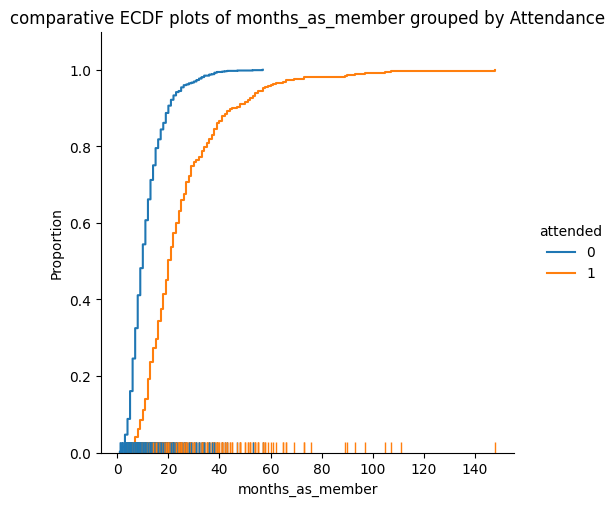

In [11]:
# plotting comparative ECDF plots 
g = sns.displot(data=gymdf, x='months_as_member', hue='attended', kind='ecdf', rug=True)
g.ax.set(title='comparative ECDF plots of months_as_member grouped by Attendance', ylim=(0,1.1))

Since by now, it is apparent that there is a correlation between the variables months_as_members and attended, let us see how they show on a linear model plot. Have chosen to draw a logistic regression plot here since one of the attended variable has only binary (0 and 1) values. Here as well, it appears that there is a positive correlation between both the variables. 

This can be further investigated by calculating the pearson correlation coefficient for the two variables, which works out to a value of about 0.485 which can be considered as weak-to-moderate, positive correlation. 

From our observations so far, I think we can safely infer that although newer members book more classes than senior members, a disproportionately higher ratio of new members fail to attend the classes they book than senior members do.

[]

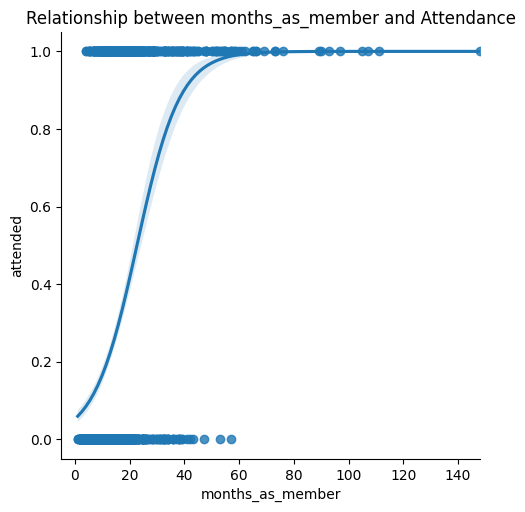

In [12]:
# drawing logistic regression plot to see correlation between attended and months_as_member
f=sns.lmplot(data=gymdf, y='attended', x='months_as_member', logistic=True) 
f.ax.set(title='Relationship between months_as_member and Attendance', xlim=(-5, 148))
f.ax.set()

In [13]:

# calculating correlation coefficient for months_as_member and attended variables 
print('Correlation coefficient for variables months_as_member vs attended:')
print(gymdf[['months_as_member', 'attended']].corr().iloc[0,1], '\n' ) # shows weak positive correlation between the variables; 

Correlation coefficient for variables months_as_member vs attended:
0.48552622327526224 



## Predicting whether members will attend using the data provided. Defining the type of machine learning problem that this is (regression/ classification/clustering).

The requirement is to predict whether members will attend or not - that is, there are only two labels of prediction: will attend (1) or will not attend (0). Based on the given problem description, this is a supervised machine learning classification problem that requires binary (only two options - codified as 0 and 1) classification. 

### Preprocessing - Converting categorical variables to numerical values 
Before fitting a model, let us first perform some preprocessing steps to prepare our data for modeling. 

Since, the machine learning algorithms that we will be working with, require numerical data, we first need to convert categorial values into numbers. We have 3 categorical columns: [day_of_week, time, category]. Out of these day_of_week, and time are ordinal, meaning their values follow a certain inherent order, whereas the 'cateogry' column is nominal, meaning the values do not have any ordering. 

For ordinal categories, we will replace the ordered category values with serial numbers as follows: 

day_of_week: (Mon = 1, Tue = 2, Wed = 3, Thu = 4, Fri = 5, Sat = 6, Sun = 7); 

time: (AM = 1, PM = 2) 

For nominal cateogories, we will convert categorical values into dummy/indicator variables (called One-hot encoding in machine learning parlance). We will do this for the 'category' variable. 



In [14]:
# replacing ordinal categories' values with serial numbers 
gymdf.day_of_week = gymdf.day_of_week.replace(dict(Mon = 1, Tue = 2, Wed = 3, Thu = 4, Fri = 5, Sat = 6, Sun = 7)).astype('int64')
gymdf.time = gymdf.time.replace(dict(AM = 1, PM = 2)).astype('int64')
# One-hot encoding category column
gymdf = pd.get_dummies(gymdf, columns=['category'])  

### Preprocessing - Splitting dataset into X & y sets for feature and target variables, respectively 
At this stage we can split the dataset into dataset X containing feature variables (all except 'attended' column), and dataset y containing target variable ('attended' column).


In [15]:
# splitting dataset into feature and target dataframes: X and y
X = gymdf.drop(columns = 'attended')
y = gymdf[['attended']]
print(X.info())
print(y.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 1 to 1500
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   months_as_member   1500 non-null   int64  
 1   weight             1500 non-null   float64
 2   days_before        1500 non-null   int64  
 3   day_of_week        1500 non-null   int64  
 4   time               1500 non-null   int64  
 5   category_Aqua      1500 non-null   uint8  
 6   category_Cycling   1500 non-null   uint8  
 7   category_HIIT      1500 non-null   uint8  
 8   category_Strength  1500 non-null   uint8  
 9   category_Yoga      1500 non-null   uint8  
 10  category_unknown   1500 non-null   uint8  
dtypes: float64(1), int64(4), uint8(6)
memory usage: 111.4 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 1 to 1500
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   attended  1500 no

### Preprocessing - Addressing variance imbalance between features 
Next we check the variance for each feature variable. We see that some columns have much higher variance values than other columns. Such variance imbalance across columns can adversely affect model performance, and to address this, we will standardize features by removing the respective mean values and scaling to unit variance for each column. We will use StandardScaler() from Scikit Learn library to do this.

In [16]:
# checking variances across all columns in the dataframe 
X.var()

months_as_member     167.095509
weight               160.792813
days_before           16.629575
day_of_week            3.976889
time                   0.182174
category_Aqua          0.048132
category_Cycling       0.187958
category_HIIT          0.247103
category_Strength      0.131292
category_Yoga          0.081955
category_unknown       0.008597
dtype: float64

### Preprocessing - Splitting into training and testing dataset and then Standardizing features 
Scaling algorithms are ideally fitted exclusively based on training feature dataset parameters (mean, and standard deviation) to avoid data leakage between training and test datasets. Both training and testing features are then transformed using the parameters derived from training data. So, we will first split the data into training and test sets, and then perform scaling as explained.

In [17]:
# splitting X and y into train and test datasets 
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=99)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1050, 11) (450, 11) (1050, 1) (450, 1)


In [18]:
# Scaling using StandardScaler()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.var(axis=0))
print(X_test.var(axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.8412493  1.10316776 0.98940586 0.93205218 1.1491253  1.4853629
 1.10287538 0.96910217 1.00166842 0.89174837 1.98657718]


## Fitting a baseline model to predict whether members will attend using the data provided.

As a baseline model, I will use LogisticRegression from Scikit Learn library. 

In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression() 
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

## Fitting a comparison model to predict whether members will attend using the data provided.
As a comparison model, I have chosen DecisionTreeClassifier from Scikit Learn Library. 

In [20]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=27) 
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test) 

## Rationale for chosing the alternative models for comparison  

I chose Logistic Regression because it is based on linear regression method which is very intuitive and relatively easy to interpret. Fitting the model is quite straight forward and works well with default parameters mostly without the need to separately explore / tune the model parameters. In its default state, it doesn't even require setting a random seed and will still produce same results on every run, while most other models need at least the random_state parameter to be set if we have to see repeatable results. As such Logistic Regression is the simplest and the most preferred first-stop model for binary classification problems. 

Having mentioned above, one weakness of linear models, including Logistic Regression, is that they can be unduly influenced by outliers, and since our data has quite a few outliers, for comparison we need to use an alternative model that doesn't use linear regression techniques, and can address the outliers. The most preferable alternative model that satisfies both these conditions for me is Decision Tree. It isn't affected as much by outliers, and if one so desires, the resulting decision tree can also be visualized graphically, which helps to interpret the working of the model better. Therefore, I chose Decision Tree as a comparison model for this problem.

## Comparing the performance of the chosen models 
I will evaluate both models against their accuracy score, which is the proportion of correct predictions given by the model out of all predictions made by the model. It is intuitive and easy to interpret, and also easy to explain to non-technical audience that may consume the report. 

In [21]:
# calculating metrics for both classification models 
from sklearn.metrics import classification_report

print('Performance metrics for Logistic Regression model')
print(classification_report(y_test, y_pred_lr))
print()
print('Performance metrics for Decision Tree model')
print(classification_report(y_test, y_pred_dt))

Performance metrics for Logistic Regression model
              precision    recall  f1-score   support

           0       0.78      0.94      0.85       314
           1       0.73      0.39      0.51       136

    accuracy                           0.77       450
   macro avg       0.75      0.66      0.68       450
weighted avg       0.76      0.77      0.75       450


Performance metrics for Decision Tree model
              precision    recall  f1-score   support

           0       0.79      0.78      0.78       314
           1       0.50      0.52      0.51       136

    accuracy                           0.70       450
   macro avg       0.65      0.65      0.65       450
weighted avg       0.70      0.70      0.70       450



## Verdict on which model has performed better 
Having fitted both models and drawn predictions from them on the test dataset, the accuracy score for Logistic Regression is 77%, while it is 70% for Decision Tree. This means that out of every 1000 predictions made, Logistic Regression is correct 770 times, while Decision Tree model is correct only 700 times. The difference of 70 (or about 10%) more correct predictions by Logistic Regression appears significant. Considering this analysis, it is clear that Logistic Regression is performing better on our chosen metric to solve the given prediction problem. 

Report Ends.